라이브러리

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'NanumGothic'

작품 선택하기

In [50]:
Drama = ['Game of Thrones', 'Greys Anatomy', 'Modern Family', 'Sherlock', 'The Big Bang Theory', 'The Good Place']
Movie = ['Men In Black', 'Moneyball', 'The Intern', 'Zootopia']

## 여기서 작품 선택합니다 꼭!!

In [51]:
title = Movie[0] # 여기서 작품 선택

if title in Drama:
    path='./Script/Drama'
    file_name = title.replace(' ', '_') + '_S1'
else:
    path='./Script/Movie'
    file_name = title.replace(' ', '_')

파일 불러오기

In [52]:
movie_data = pd.read_csv(f'{path}/{title}/{file_name}.csv', header=None)

In [53]:
movie = movie_data

데이터 정보

In [54]:
movie.info()
movie.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9741 entries, 0 to 9740
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1649 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB


,0
0,Goddamn bugs.
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,"Oh, shit!"
9,NaN


널 데이터 삭제

In [55]:
movie = movie.dropna()
movie.info()
movie.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 9740
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


,0
0,Goddamn bugs.
8,"Oh, shit!"
16,"Oh, crap."
24,"Well, Nick the Dick."
26,What a surprise.
34,"Where you coming from, Nick?"
42,Fishing in Cuernavaca.
50,Sure you are.
52,Let's take a look at your catch.
60,Come on.


DataFrame -> list

In [56]:
list_movie = list(np.array(movie[0].tolist()))
# list(np.array(df[0].tolist()))
len(list_movie)
list_movie[:10]
text_movie = ' '.join(list_movie)
#text_movie

괄호 제거

In [57]:
import re

text_movie = re.sub(r'\([^)]*\)', '', text_movie)   # 소괄호 처리
text_movie = re.sub(r'\[[^)]*\]', '', text_movie)   # 중괄호 처리
text_movie = re.sub(r'\{[^)]*\}', '', text_movie)   # 대괄호 처리
#text_movie

영문자 이외 문자는 공백으로 변환

In [58]:
# 영문자 이외 문자는 공백으로 변환
only_english_movie = re.sub('[^a-zA-Z]', ' ', text_movie)
#only_english_movie

소문자로 변환

In [59]:
	# 소문자 변환
no_capitals_movie = only_english_movie.lower().split()
len(no_capitals_movie)

7520

# nltk 설치!! 만약에 설치되어 있으면 주석 처리하기!!

In [60]:
# 설치 되었으면 주석 처리하기
# !pip3 install nltk

In [61]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuliejung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
 # 불용어 제거
stops = set(stopwords.words('english'))
no_stops_movie = [word for word in no_capitals_movie if not word in stops]
len(no_stops_movie)

3421

In [63]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [64]:
no_stops_movie

['goddamn',
 'bugs',
 'oh',
 'shit',
 'oh',
 'crap',
 'well',
 'nick',
 'dick',
 'surprise',
 'coming',
 'nick',
 'fishing',
 'cuernavaca',
 'sure',
 'let',
 'take',
 'look',
 'catch',
 'come',
 'would',
 'thrown',
 'back',
 'get',
 'bucks',
 'head',
 'hope',
 'saved',
 'lawyer',
 'gonna',
 'need',
 'take',
 'hell',
 'n',
 'division',
 'division',
 'never',
 'heard',
 'division',
 'really',
 'got',
 'money',
 'dee',
 'tough',
 'call',
 'kay',
 'got',
 'winner',
 'oh',
 'know',
 'sir',
 'sir',
 'young',
 'man',
 'idea',
 'dealing',
 'going',
 'chat',
 'friend',
 'hit',
 'road',
 'keep',
 'protecting',
 'us',
 'dangerous',
 'aliens',
 'ever',
 'hear',
 'division',
 'division',
 'bullshit',
 'hell',
 'yeah',
 'looks',
 'like',
 'fell',
 'bus',
 'wrong',
 'part',
 'town',
 'amigo',
 'bet',
 'dollars',
 'pesos',
 'anywhere',
 'near',
 'mikey',
 'let',
 'jail',
 'political',
 'refugee',
 'right',
 'know',
 'many',
 'treaties',
 'violated',
 'one',
 'try',
 'seven',
 'enough',
 'mikey',
 'han

어간 추출

In [65]:
# # 어간 추출
# stemmer = nltk.stem.SnowballStemmer('english')
# stemmer_words = [stemmer.stem(word) for word in no_stops]

list -> DataFrame

In [66]:
df_movie = pd.DataFrame(no_stops_movie)
result_movie = pd.DataFrame(df_movie.value_counts())
result_movie = result_movie.rename_axis('words').rename(columns={0: 'counts'})
result_movie

,counts
words,
get,39
right,37
know,34
got,31
like,31
...,...
induction,1
infectious,1
inferiority,1


파일로 저장

In [67]:
result_movie.to_csv(f'{path}/{title}/unique_words_{file_name}.csv', sep=',')

저장한 파일 확인

In [68]:
data = pd.read_csv(f'{path}/{title}/unique_words_{file_name}.csv')
data

,words,counts
0,get,39
1,right,37
2,know,34
3,got,31
4,like,31
...,...,...
1393,induction,1
1394,infectious,1
1395,inferiority,1
1396,infest,1


정제된 대본 데이터 불러오기

In [69]:
data = pd.read_csv(f'{path}/{title}/unique_words_{file_name}.csv')
script_data = data
script_data.info()
display(script_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   1398 non-null   object
 1   counts  1398 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.0+ KB


,words,counts
0,get,39
1,right,37
2,know,34
3,got,31
4,like,31
...,...,...
1393,induction,1
1394,infectious,1
1395,inferiority,1
1396,infest,1


기준 단어 데이터 불러오기

In [70]:
words = pd.read_csv('./Words/word - AllLevels.csv')
words

,word,level
0,1.0,TRUE
1,1.0,zero
2,1.0,young
3,1.0,you
4,1.0,yet
...,...,...
24836,NaN,vaunted
24837,NaN,vehemence
24838,NaN,victimizer
24839,NaN,washout


단어 데이터에서 레벨이 없는 단어들은 999로 처리

In [71]:
words['word'] = words['word'].fillna(999).astype('int64')
words = words.rename(columns={'word':'level', 'level':'words'})
words

,level,words
0,1,TRUE
1,1,zero
2,1,young
3,1,you
4,1,yet
...,...,...
24836,999,vaunted
24837,999,vehemence
24838,999,victimizer
24839,999,washout


대본과 매칭되는 단어가 있다면 레벨 입력하고, 대본과 매칭되는 단어가 없다면 0 입력

In [82]:
matched_data = pd.merge(script_data, words, how='left', on='words')
matched_data.info()
matched_data = matched_data.fillna(0)
matched_data['level'] = matched_data['level'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1397
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   1398 non-null   object 
 1   counts  1398 non-null   int64  
 2   level   957 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 43.7+ KB


,words,counts,level
0,get,39,1
1,right,37,1
2,know,34,1
3,got,31,0
4,like,31,1
...,...,...,...
1393,induction,1,999
1394,infectious,1,999
1395,inferiority,1,999
1396,infest,1,999


result 데이터 프레임 생성

In [73]:
result = pd.DataFrame(matched_data.value_counts('level'))
result = result.rename(columns={0: 'count'})
result

,count
level,
1,443
0,441
999,249
2,148
3,51
4,36
5,30


In [74]:
result['rate'] = [i / len(script_data) * 100 for i in result['count']]
result = result.sort_index().reset_index()
result

,level,count,rate
0,0,441,31.545064
1,1,443,31.688126
2,2,148,10.586552
3,3,51,3.648069
4,4,36,2.575107
5,5,30,2.145923
6,999,249,17.811159


<AxesSubplot:xlabel='level'>

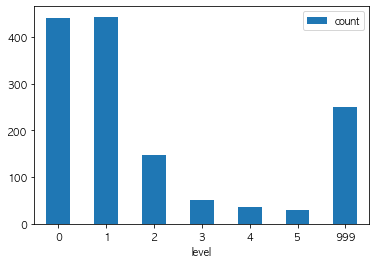

In [75]:

result.plot(x='level', y='count', kind='bar', rot=0)

단어 데이터에 있다면 True, 없다면 False인 matched 컬럼

In [90]:
# pd.set_option('display.max_row', 2000)
matched_data['matched'] = [True if i in [1, 2, 3, 4, 5, 999] else False for i in matched_data['level']]

In [91]:
matched_data


,words,counts,level,matched
0,get,39,1,True
1,right,37,1,True
2,know,34,1,True
3,got,31,0,False
4,like,31,1,True
5,one,31,1,True
6,going,29,0,False
7,look,24,1,True
8,man,23,1,True
9,want,22,1,True


In [78]:
matched_data = pd.merge(script_data, words, how='left', on='words')
matched_data.info()
matched_data = matched_data.fillna(0)
matched_data['level'] = matched_data['level'].astype('int64')
matched_data = matched_data[matched_data['level'] != 0]
matched_data = matched_data[matched_data['level'] != 999]
matched_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1397
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   1398 non-null   object 
 1   counts  1398 non-null   int64  
 2   level   957 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 43.7+ KB


,words,counts,level
0,get,39,1
1,right,37,1
2,know,34,1
4,like,31,1
5,one,31,1
...,...,...,...
1387,impress,1,2
1388,impression,1,3
1390,increase,1,2
1391,independence,1,3


In [79]:
result = pd.DataFrame(matched_data.value_counts('level'))
result = result.rename(columns={0: 'count'})
result

,count
level,
1,443
2,148
3,51
4,36
5,30


In [80]:
result['rate'] = [i / len(matched_data) * 100 for i in result['count']]
result = result.sort_index().reset_index()
result

,level,count,rate
0,1,443,62.570621
1,2,148,20.903955
2,3,51,7.203390
3,4,36,5.084746
4,5,30,4.237288


<AxesSubplot:xlabel='level'>

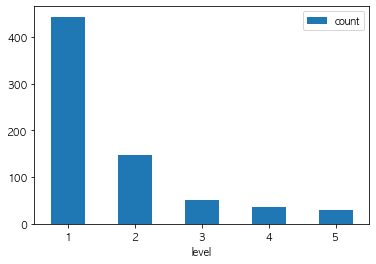

In [81]:

result.plot(x='level', y='count', kind='bar', rot=0)